In [1]:
# import needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from itertools import product
from sklearn import linear_model
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = None
df = pd.read_csv(r'C:\Users\Krist\onedrive\Desktop\capstone\diabetes_prediction_dataset.csv')

In [3]:
df.head(25)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
unique_gender=df['gender'].unique()
print(unique_gender)

['Female' 'Male' 'Other']


In [6]:
#change gender
gen_dict = {'gender': {'Male':1, 'Female':2, 'Other':3}}
df.replace(gen_dict, inplace = True)

In [7]:
unique_smoking_history = df['smoking_history'].unique()
print(unique_smoking_history)

['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [8]:
smok_dict= {'smoking_history': {'never': 0, 'No Info':0, 'current':2, 'former':1, 'ever':1, 'not current':1}}
df.replace(smok_dict, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [10]:
describe = ['age', 'bmi', 'HbA1c_level']
print(df[describe].describe())

                 age            bmi    HbA1c_level
count  100000.000000  100000.000000  100000.000000
mean       41.885856      27.320767       5.527507
std        22.516840       6.636783       1.070672
min         0.080000      10.010000       3.500000
25%        24.000000      23.630000       4.800000
50%        43.000000      27.320000       5.800000
75%        60.000000      29.580000       6.200000
max        80.000000      95.690000       9.000000


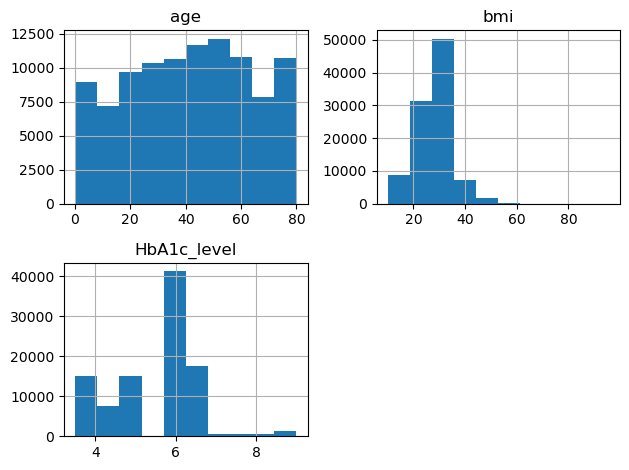

In [11]:
df[['age', 'bmi', 'HbA1c_level']].hist()
plt.tight_layout()

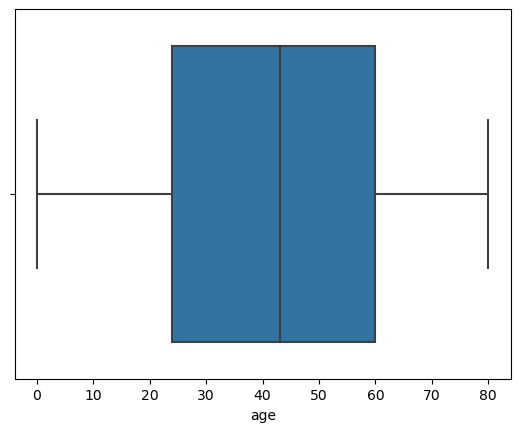

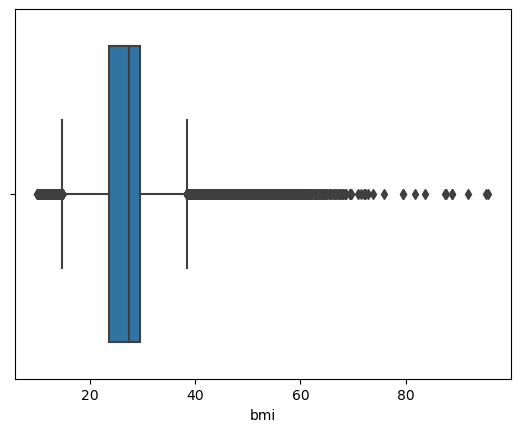

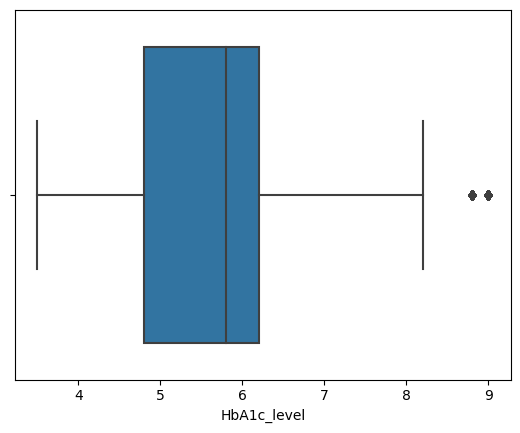

In [27]:
sns.boxplot('age', data=df)
plt.show()
sns.boxplot('bmi', data=df)
plt.show()
sns.boxplot('HbA1c_level', data=df)
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
columns_to_normalize = ['age', 'HbA1c_level', 'bmi']
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [18]:
#create dataframe with independent variables
X=df[['gender', 'age', 'smoking_history', 'bmi', 'HbA1c_level']]
#create dataframe with dependent variable
y=df[['heart_disease']]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14, train_size = .8, stratify = y)

In [20]:
logreg = linear_model.LogisticRegression()

In [21]:
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

In [22]:
print(logreg.coef_)

[[-0.87562071  1.80971913  0.36233327  0.21355872  0.17267273]]


In [23]:
print(logreg.intercept_)

[-3.35814421]


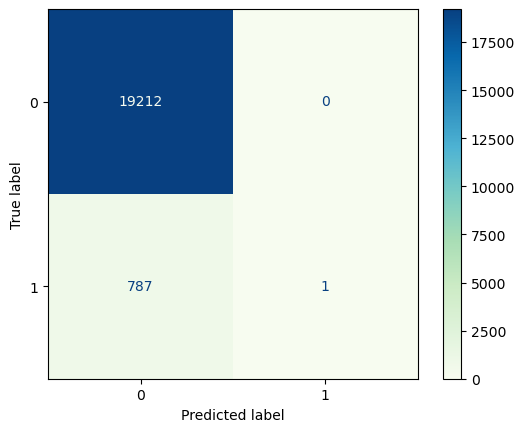

In [24]:
c_matrix=metrics.plot_confusion_matrix(logreg, X_test, y_test, cmap='GnBu')

In [25]:
# determine accuracy
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.96065


In [26]:
df.var()

gender                    0.242987
age                       1.000010
hypertension              0.069248
heart_disease             0.037866
smoking_history           0.422210
bmi                       1.000010
HbA1c_level               1.000010
blood_glucose_level    1657.152341
diabetes                  0.077776
dtype: float64

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
estimator = logreg
rfe = RFE(estimator, n_features_to_select=5)
X_selected = rfe.fit_transform(X, y)
selected_indices = rfe.get_support(indices=True)
selected_features = X.columns[selected_indices]
feature_ranking = rfe.ranking_

In [28]:
for feature, rank in zip(selected_features, feature_ranking):
    print("Feature: {}, Ranking: {}".format(feature, rank))

Feature: gender, Ranking: 1
Feature: age, Ranking: 1
Feature: smoking_history, Ranking: 1
Feature: bmi, Ranking: 1
Feature: HbA1c_level, Ranking: 1


In [29]:
#all features ranked equally important